In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.sort_values('Datetime',ascending=True,inplace=True)
df.columns=['date_time','aep_mw']

In [3]:
df.head()

,date_time,aep_mw
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0


In [4]:
def preparion (df,num_lags,lag_feature):
    df_prpocessed=pd.DataFrame(index=df.index,columns=['date_time','cos_day_year','sin_day_year',
                                                       'cos_day_week','sin_day_week','cos_hour','sin_hour']+['lags_{}'.format(i) for i in range(num_lags)]+['target'])
    #df_prpocessed=pd.DataFrame(index=df.index,columns=['lags_{}'.format(i) for i in range(num_lags)]+['target'])
    df_prpocessed['target']=df[lag_feature].shift(-1)
    for i in range(num_lags):
        df_prpocessed['lags_{}'.format(i)]=df[lag_feature].shift(i)

    df_prpocessed['date_time']=df['date_time']
    df_prpocessed.index=df['date_time']
    

    a=pd.Series(pd.to_datetime(df_prpocessed['date_time']))+timedelta(hours=1)
    df_prpocessed['cos_day_year']=np.cos(2*np.pi*a.dt.day_of_year/366)
    df_prpocessed['sin_day_year']=pd.Series(np.sin(2*np.pi*a.dt.day_of_year/366),index=df_prpocessed.index)
    df_prpocessed['cos_day_week']=pd.Series(np.cos(2*np.pi*a.dt.day/7),index=df_prpocessed.index)
    df_prpocessed['sin_day_week']=pd.Series(np.sin(2*np.pi*a.dt.day/7),index=df_prpocessed.index)
    df_prpocessed['cos_hour']=pd.Series(np.cos(2*np.pi*a.dt.hour/24),index=df_prpocessed.index)
    df_prpocessed['sin_hour']=pd.Series(np.sin(2*np.pi*a.dt.hour/24),index=df_prpocessed.index)
    
    
    #df_prpocessed.index=list(df_prpocessed['date_time'])
    df_prpocessed.drop('date_time',axis=1,inplace=True)
    df_prpocessed.dropna(inplace=True)
    return df_prpocessed

In [5]:
train_df=df[df['date_time']<='2017-08-02 23:00:00']
train_df=preparion(train_df,168*4+1,'aep_mw')
train_df

,cos_day_year,sin_day_year,cos_day_week,sin_day_week,cos_hour,sin_hour,lags_0,lags_1,lags_2,lags_3,...,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671,lags_672,target
date_time,,,,,,,,,,,,,,,,,,,,,
2004-10-29 01:00:00,0.469977,-0.882679,0.623490,0.781831,8.660254e-01,0.500000,12510.0,13355.0,14353.0,15309.0,...,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0,12022.0
2004-10-29 02:00:00,0.469977,-0.882679,0.623490,0.781831,7.071068e-01,0.707107,12022.0,12510.0,13355.0,14353.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,11753.0
2004-10-29 03:00:00,0.469977,-0.882679,0.623490,0.781831,5.000000e-01,0.866025,11753.0,12022.0,12510.0,13355.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11530.0
2004-10-29 04:00:00,0.469977,-0.882679,0.623490,0.781831,2.588190e-01,0.965926,11530.0,11753.0,12022.0,12510.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11744.0
2004-10-29 05:00:00,0.469977,-0.882679,0.623490,0.781831,6.123234e-17,1.000000,11744.0,11530.0,11753.0,12022.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,12355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-02 18:00:00,-0.861702,-0.507415,-0.222521,0.974928,2.588190e-01,-0.965926,19585.0,19749.0,19921.0,19797.0,...,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,19046.0,19451.0,19151.0
2017-08-02 19:00:00,-0.861702,-0.507415,-0.222521,0.974928,5.000000e-01,-0.866025,19151.0,19585.0,19749.0,19921.0,...,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,19046.0,18495.0
2017-08-02 20:00:00,-0.861702,-0.507415,-0.222521,0.974928,7.071068e-01,-0.707107,18495.0,19151.0,19585.0,19749.0,...,12478.0,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,17771.0


In [6]:
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split


In [7]:
X_train=train_df.drop('target',axis=1)
y_train=train_df['target']

In [8]:
X_fit,X_val,y_fit,y_val=train_test_split(X_train,y_train,test_size=0.3)
# Bench model 
model=XGBRegressor(objective='reg:absoluteerror',tree_method='hist',n_estimators=10000,learning_rate=0.1,max_depth=5,eval_metric='mape',n_jobs=-1,early_stopping_rounds=50).fit(X_val,y_val,eval_set=[(X_val,y_val)])

[0]	validation_0-mape:0.05997
[1]	validation_0-mape:0.03614
[2]	validation_0-mape:0.02692
[3]	validation_0-mape:0.02246
[4]	validation_0-mape:0.01992
[5]	validation_0-mape:0.01838
[6]	validation_0-mape:0.01762
[7]	validation_0-mape:0.01687
[8]	validation_0-mape:0.01637
[9]	validation_0-mape:0.01601
[10]	validation_0-mape:0.01553
[11]	validation_0-mape:0.01530
[12]	validation_0-mape:0.01493
[13]	validation_0-mape:0.01475
[14]	validation_0-mape:0.01459
[15]	validation_0-mape:0.01446
[16]	validation_0-mape:0.01434
[17]	validation_0-mape:0.01406
[18]	validation_0-mape:0.01388
[19]	validation_0-mape:0.01372
[20]	validation_0-mape:0.01361
[21]	validation_0-mape:0.01354
[22]	validation_0-mape:0.01330
[23]	validation_0-mape:0.01310
[24]	validation_0-mape:0.01300
[25]	validation_0-mape:0.01291
[26]	validation_0-mape:0.01284
[27]	validation_0-mape:0.01279
[28]	validation_0-mape:0.01267
[29]	validation_0-mape:0.01258
[30]	validation_0-mape:0.01245
[31]	validation_0-mape:0.01228
[32]	validation_0-

In [8]:
test_df=preparion(df,168*4+1,'aep_mw')
test_df=test_df[test_df.index>'2017-08-02 23:00:00']
test_df.head()

,cos_day_year,sin_day_year,cos_day_week,sin_day_week,cos_hour,sin_hour,lags_0,lags_1,lags_2,lags_3,...,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671,lags_672,target
date_time,,,,,,,,,,,,,,,,,,,,,
2017-08-03 00:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.965926,0.258819,14812.0,16100.0,17220.0,17771.0,...,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,13232.0,13913.0,14963.0,13682.0
2017-08-03 01:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.866025,0.500000,13682.0,14812.0,16100.0,17220.0,...,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,13232.0,13913.0,12841.0
2017-08-03 02:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.707107,0.707107,12841.0,13682.0,14812.0,16100.0,...,15524.0,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,13232.0,12443.0
2017-08-03 03:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.500000,0.866025,12443.0,12841.0,13682.0,14812.0,...,16237.0,15524.0,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,12213.0
2017-08-03 04:00:00,-0.852864,-0.522133,-0.900969,0.433884,0.258819,0.965926,12213.0,12443.0,12841.0,13682.0,...,16773.0,16237.0,15524.0,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12286.0


In [9]:
test_df.index[0]

'2017-08-03 00:00:00'

In [10]:
X_test=test_df.drop('target',axis=1)
y_test=test_df['target']

In [11]:
model=XGBRegressor(tree_method='hist',n_estimators=9700,learning_rate=0.1,max_depth=5,eval_metric='mape',n_jobs=-1,verbosity=1).fit(X_train,y_train,eval_set=[(X_test,y_test)])
pred=model.predict(X_test)

[0]	validation_0-mape:0.89974
[1]	validation_0-mape:0.80954
[2]	validation_0-mape:0.72837
[3]	validation_0-mape:0.65533
[4]	validation_0-mape:0.58961
[5]	validation_0-mape:0.53044
[6]	validation_0-mape:0.47717
[7]	validation_0-mape:0.42926
[8]	validation_0-mape:0.38619
[9]	validation_0-mape:0.34742
[10]	validation_0-mape:0.31253
[11]	validation_0-mape:0.28111
[12]	validation_0-mape:0.25282
[13]	validation_0-mape:0.22737
[14]	validation_0-mape:0.20449
[15]	validation_0-mape:0.18390
[16]	validation_0-mape:0.16543
[17]	validation_0-mape:0.14876
[18]	validation_0-mape:0.13374
[19]	validation_0-mape:0.12023
[20]	validation_0-mape:0.10810
[21]	validation_0-mape:0.09721
[22]	validation_0-mape:0.08738
[23]	validation_0-mape:0.07857
[24]	validation_0-mape:0.07060
[25]	validation_0-mape:0.06343
[26]	validation_0-mape:0.05698
[27]	validation_0-mape:0.05117
[28]	validation_0-mape:0.04596
[29]	validation_0-mape:0.04129
[30]	validation_0-mape:0.03709
[31]	validation_0-mape:0.03334
[32]	validation_0-

In [15]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred)

(0.007535494984426546, 112.28176793486016)

<Axes: xlabel='date_time'>

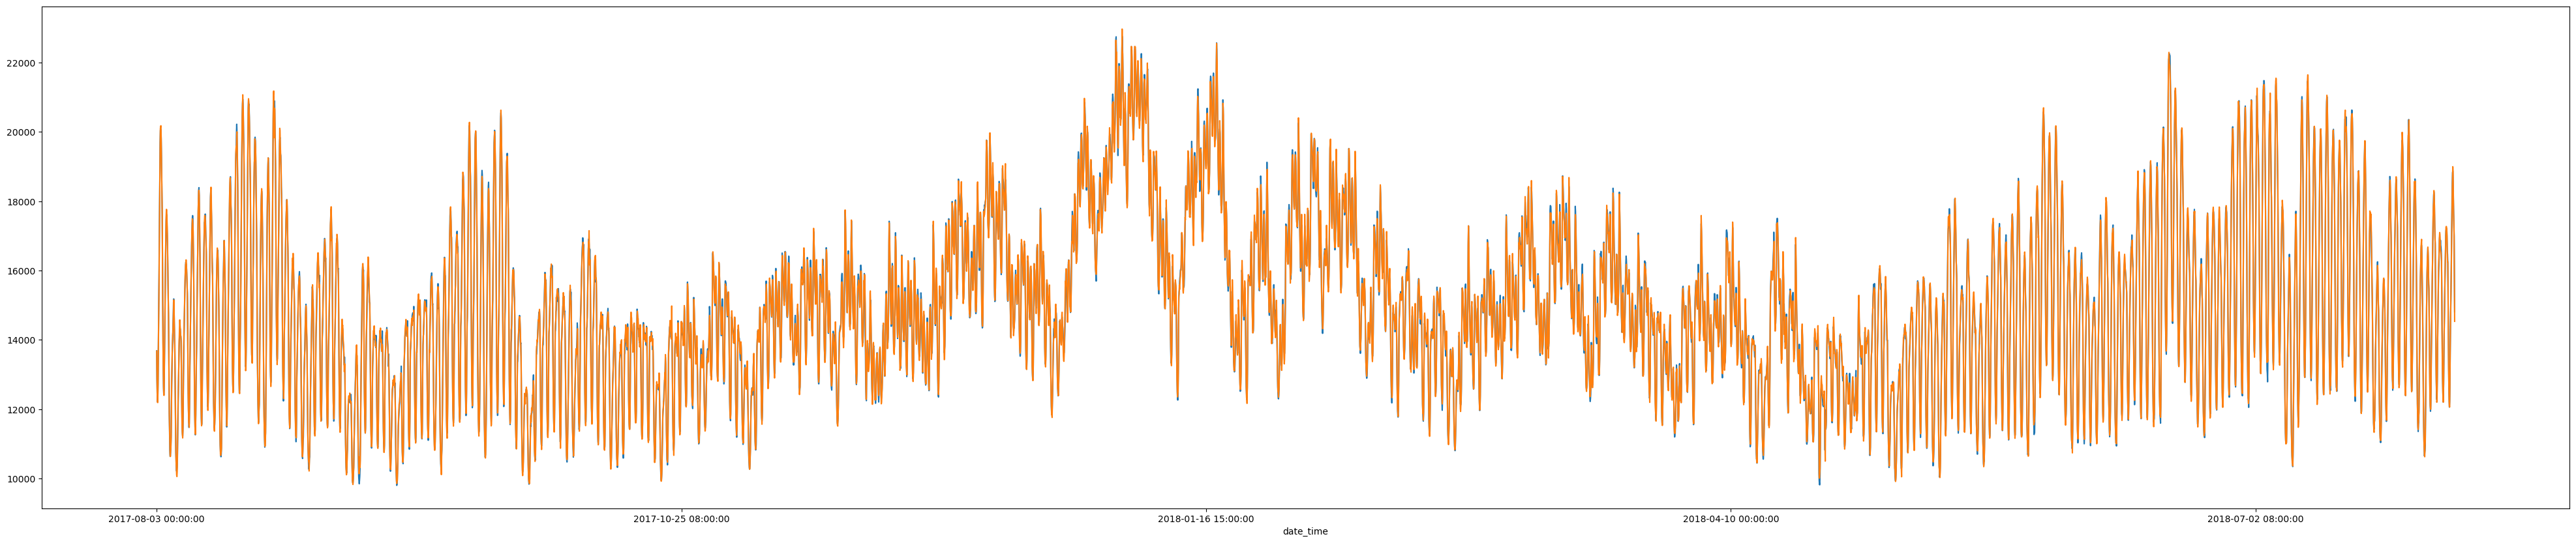

In [16]:
y_test.plot()
pd.Series(pred.reshape(-1)).plot(figsize=(50,10))

In [17]:
dateTimeIndex=df.iloc[-168*53-2:]['date_time']
test_start_hear=dateTimeIndex.iloc[0]
test_start_hear

'2017-07-27 23:00:00'

In [18]:
def dayahead_forecast(df,selected_date):
   pred_df=pd.DataFrame(index=range(1,41),columns=['date_time','forecast'])
   new_X=preparion(df[df['date_time']<=selected_date].tail(1000),168*4+1,'aep_mw').drop('target',axis=1).tail(1)
   new_X.index=[0]
   invest_mat=new_X
   for i in range(1,41):

      pred_df.loc[i,'date_time']=str(datetime.strptime(selected_date,'%Y-%m-%d %H:%M:%S')+timedelta(hours=i))
      pred=model.predict(new_X)[0]
      pred_df.loc[i,'forecast']=pred
      new_X=new_X.shift(1,axis=1)
      new_X.loc[0,'lags_0']=pred
      new_X['date_time']=str(datetime.strptime(selected_date,'%Y-%m-%d %H:%M:%S')+timedelta(hours=i))
      a=pd.Series(pd.to_datetime(new_X['date_time']))+timedelta(hours=1)
      new_X['cos_day_year']=np.cos(2*np.pi*a.dt.day_of_year/366)
      new_X['sin_day_year']=pd.Series(np.sin(2*np.pi*a.dt.day_of_year/366),index=new_X.index)
      new_X['cos_day_week']=pd.Series(np.cos(2*np.pi*a.dt.day/7),index=new_X.index)
      new_X['sin_day_week']=pd.Series(np.sin(2*np.pi*a.dt.day/7),index=new_X.index)
      new_X['cos_hour']=pd.Series(np.cos(2*np.pi*a.dt.hour/24),index=new_X.index)
      new_X['sin_hour']=pd.Series(np.sin(2*np.pi*a.dt.hour/24),index=new_X.index)
      new_X.drop('date_time',axis=1,inplace=True)
      invest_mat=pd.concat([invest_mat,new_X])

   #pred_df=pred_df.iloc[16:]
   pred_df=pred_df.merge(df,on=['date_time'])
   pred_df.index=pred_df['date_time']
   pred_df.drop('date_time',axis=1,inplace=True)
   
   return pred_df

In [19]:
a=df[df['date_time']>test_start_hear]
a['date_time']=pd.to_datetime(a['date_time'])
date_time_list=a.loc[(a['date_time'].dt.hour==8),'date_time']
date_time_list[:-1]

111130   2017-07-28 08:00:00
111106   2017-07-29 08:00:00
111082   2017-07-30 08:00:00
111058   2017-07-31 08:00:00
111034   2017-08-01 08:00:00
                 ...        
116265   2018-07-28 08:00:00
116241   2018-07-29 08:00:00
116217   2018-07-30 08:00:00
116193   2018-07-31 08:00:00
116169   2018-08-01 08:00:00
Name: date_time, Length: 370, dtype: datetime64[ns]

In [20]:
forecast_dayahead=pd.DataFrame()
for d_t in date_time_list[:-1]:
    d_t=str(d_t)
    temp=dayahead_forecast(df,d_t)
    temp=temp.iloc[16:]
    forecast_dayahead=pd.concat([forecast_dayahead,temp])
    print(d_t)


2017-07-28 08:00:00
2017-07-29 08:00:00
2017-07-30 08:00:00
2017-07-31 08:00:00
2017-08-01 08:00:00
2017-08-02 08:00:00
2017-08-03 08:00:00
2017-08-04 08:00:00
2017-08-05 08:00:00
2017-08-06 08:00:00
2017-08-07 08:00:00
2017-08-08 08:00:00
2017-08-09 08:00:00
2017-08-10 08:00:00
2017-08-11 08:00:00
2017-08-12 08:00:00
2017-08-13 08:00:00
2017-08-14 08:00:00
2017-08-15 08:00:00
2017-08-16 08:00:00
2017-08-17 08:00:00
2017-08-18 08:00:00
2017-08-19 08:00:00
2017-08-20 08:00:00
2017-08-21 08:00:00
2017-08-22 08:00:00
2017-08-23 08:00:00
2017-08-24 08:00:00
2017-08-25 08:00:00
2017-08-26 08:00:00
2017-08-27 08:00:00
2017-08-28 08:00:00
2017-08-29 08:00:00
2017-08-30 08:00:00
2017-08-31 08:00:00
2017-09-01 08:00:00
2017-09-02 08:00:00
2017-09-03 08:00:00
2017-09-04 08:00:00
2017-09-05 08:00:00
2017-09-06 08:00:00
2017-09-07 08:00:00
2017-09-08 08:00:00
2017-09-09 08:00:00
2017-09-10 08:00:00
2017-09-11 08:00:00
2017-09-12 08:00:00
2017-09-13 08:00:00
2017-09-14 08:00:00
2017-09-15 08:00:00


<Axes: xlabel='date_time'>

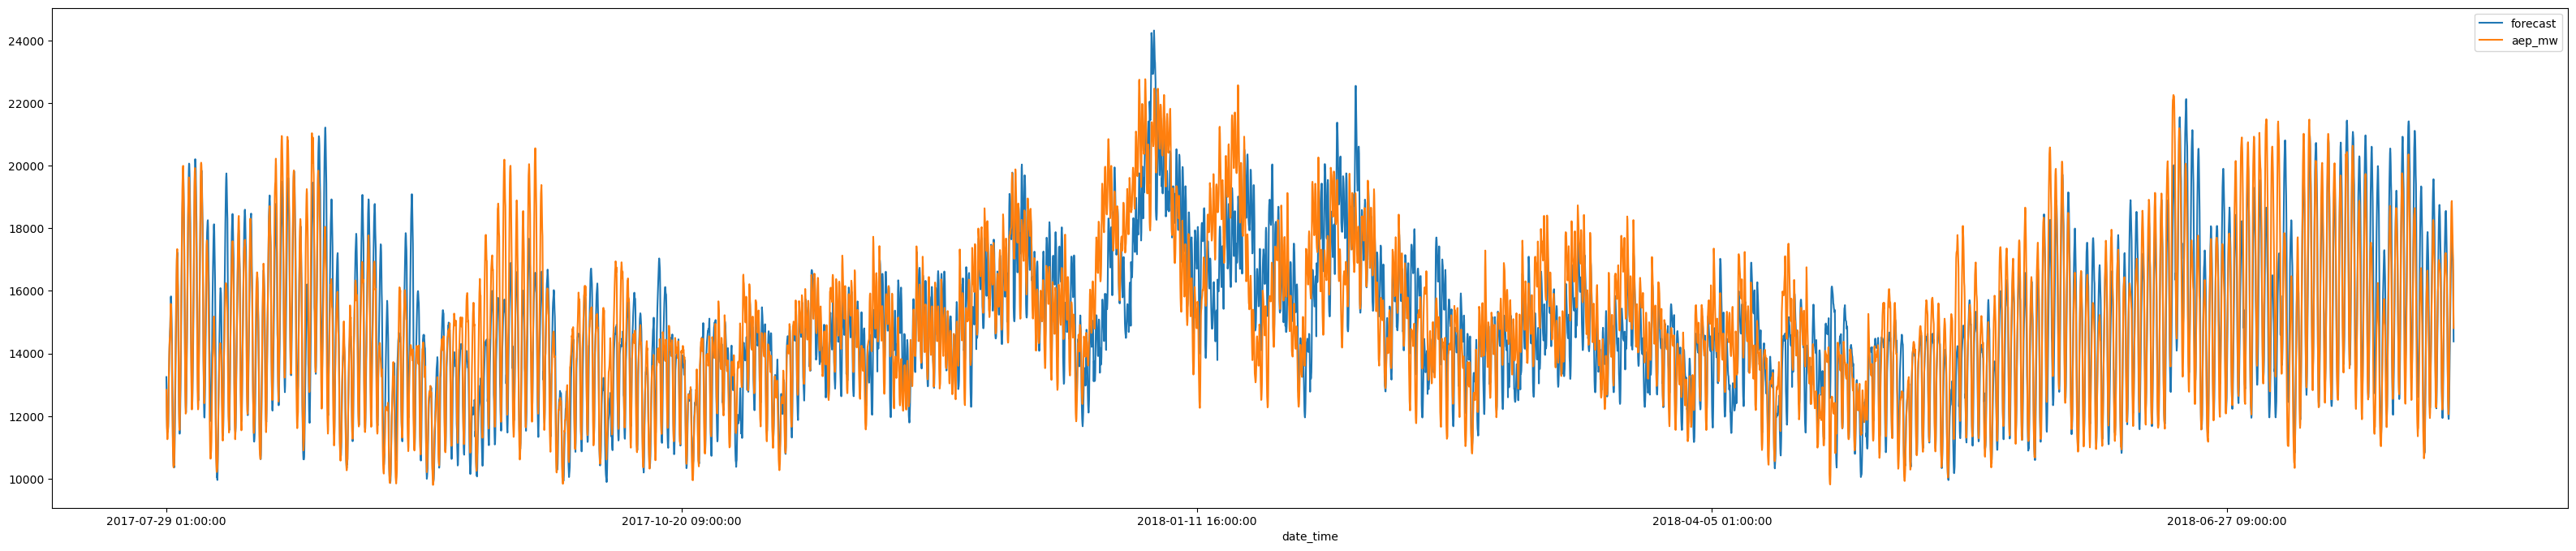

In [21]:
forecast_dayahead.plot(figsize=(40,8))

In [22]:
mean_absolute_percentage_error(forecast_dayahead['aep_mw'],forecast_dayahead['forecast'])

0.06491745851528748

In [23]:
mean_absolute_error(forecast_dayahead['aep_mw'],forecast_dayahead['forecast'])

998.6935469893722

In [24]:
forecast_dayahead['aep_mw'].max(),forecast_dayahead['aep_mw'].min()

(22759.0, 9801.0)

In [25]:
len(pd.Series(forecast_dayahead.index))

8880

In [26]:
import plotly.graph_objects as go 
figure=go.Figure()
figure.add_trace(go.Scatter(x=forecast_dayahead.index,y=forecast_dayahead['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(x=forecast_dayahead.index,y=forecast_dayahead['forecast'],name='xgboost_forecast'))